In [2]:
import pandas as pd
import os 
import plotnine as p9
import warnings              #To remove warnings
warnings.filterwarnings("ignore")

curry_gl = pd.read_excel('stephen_curry_gamelog.xlsx')
curry_gl.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,GO,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Unnamed: 30
0,1,1.0,2018-10-16,30-216,GSW,NaN,OKC,W (+8),1,36:37,...,8.0,9.0,1.0,0.0,3.0,4.0,32.0,27.5,15.0,NaN
1,2,2.0,2018-10-19,30-219,GSW,@,UTA,W (+1),1,37:07,...,4.0,8.0,2.0,0.0,4.0,2.0,31.0,23.4,-3.0,NaN
2,3,3.0,2018-10-21,30-221,GSW,@,DEN,L (-2),1,39:13,...,4.0,6.0,0.0,0.0,2.0,4.0,30.0,19.7,3.0,NaN
3,4,4.0,2018-10-22,30-222,GSW,NaN,PHO,W (+20),1,29:40,...,4.0,8.0,2.0,0.0,3.0,0.0,29.0,26.2,18.0,NaN
4,5,5.0,2018-10-24,30-224,GSW,NaN,WAS,W (+22),1,31:35,...,4.0,3.0,0.0,1.0,2.0,1.0,51.0,41.8,19.0,NaN


In [62]:
GameW = curry_gl.loc[curry_gl.GO.str.startswith('W')]
GameL = curry_gl.loc[curry_gl.GO.str.startswith('L')]
GameW_CurryA = curry_gl.loc[(curry_gl.GO.str.startswith('W')) & (curry_gl.GS == 1)]
GameW_CurryA = GameW_CurryA[['GO','GS']]
GameW_CurryA['GO'] = 'W'
GameW_CurryA['GS'] = 'Active'
GameW_CurryA

,GO,GS
0,W,Active
1,W,Active
3,W,Active
4,W,Active
5,W,Active
6,W,Active
7,W,Active
8,W,Active
9,W,Active
10,W,Active


In [78]:
GameL_CurryA = curry_gl.loc[(curry_gl.GO.str.startswith('L')) & (curry_gl.GS == 1)]
GameL_CurryA = GameL_CurryA[['GO','GS']]
GameL_CurryA['GO'] = 'L'
GameL_CurryA['GS'] = 'Active'
GameL_CurryA

In [80]:
Game_CurryA = pd.concat([GameL_CurryA,GameW_CurryA])
Game_CurryA

,GO,GS
2,L,Active
11,L,Active
0,W,Active
1,W,Active
3,W,Active
4,W,Active
5,W,Active
6,W,Active
7,W,Active
8,W,Active


In [58]:
GameW_CurryI = curry_gl.loc[(curry_gl.GO.str.startswith('W')) & (curry_gl.GS == 'Inactive')]
GameW_CurryI = GameW_CurryI[['GO','GS']]
GameW_CurryI['GO'] = 'W'
GameW_CurryI

,GO,GS
12,W,Inactive
14,W,Inactive
19,W,Inactive
20,W,Inactive


In [61]:
GameL_CurryI = curry_gl.loc[(curry_gl.GO.str.startswith('L')) & (curry_gl.GS == 'Inactive')]
GameL_CurryI = GameL_CurryI[['GO','GS']]
GameL_CurryI['GO'] = 'L'
GameL_CurryI

,GO,GS
13,L,Inactive
15,L,Inactive
16,L,Inactive
17,L,Inactive
18,L,Inactive


In [90]:
Game_Curry = pd.concat([Game_CurryI, Game_CurryA])

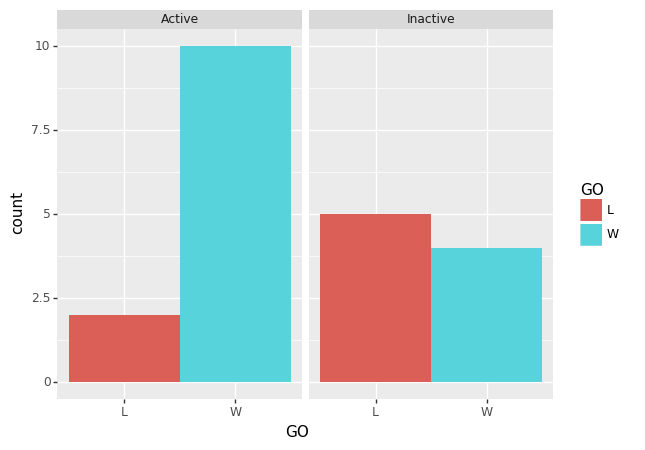

<ggplot: (8781849437290)>

In [93]:
p9.ggplot(Game_Curry) + p9.aes(x = 'GO' ,count = 'GS', fill = 'GO') + p9.geom_histogram() + p9.facet_wrap('~GS', ncol = 2)

In [5]:
teamdata = pd.read_excel('teamdata.xlsx')
teamdata

,Year,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2012-13,1.0,Denver Nuggets*,82,242.7,40.7,85.2,0.478,6.4,18.5,...,0.701,13.3,31.7,45.0,24.4,9.3,6.5,15.3,20.5,106.1
1,2012-13,2.0,Houston Rockets*,82,241.2,38.1,82.7,0.461,10.6,28.9,...,0.754,11.1,32.3,43.4,23.2,8.3,4.4,16.4,20.3,106.0
2,2012-13,3.0,Oklahoma City Thunder*,82,241.8,38.1,79.3,0.481,7.3,19.4,...,0.828,10.4,33.2,43.6,21.4,8.3,7.6,15.3,20.2,105.7
3,2012-13,4.0,San Antonio Spurs*,82,242.4,39.1,81.4,0.481,8.1,21.5,...,0.791,8.1,33.2,41.3,25.1,8.5,5.4,14.7,17.4,103.0
4,2012-13,5.0,Miami Heat*,82,242.4,38.4,77.4,0.496,8.7,22.1,...,0.754,8.2,30.4,38.6,23.0,8.7,5.4,13.9,18.7,102.9
5,2012-13,6.0,Los Angeles Lakers*,82,240.9,37.1,81.0,0.458,8.7,24.6,...,0.692,11.5,33.3,44.8,22.2,7.0,5.2,15.0,17.9,102.2
6,2012-13,7.0,Golden State Warriors*,82,241.5,38.2,83.4,0.458,8.0,19.9,...,0.790,10.8,34.2,45.0,22.5,6.9,4.2,15.1,21.4,101.2
7,2012-13,8.0,Dallas Mavericks,82,243.7,38.8,84.0,0.462,7.4,19.9,...,0.793,9.4,32.6,41.9,23.2,7.9,5.5,14.0,20.7,101.1
8,2012-13,9.0,Los Angeles Clippers*,82,240.6,38.5,80.6,0.478,7.6,21.4,...,0.711,11.4,30.2,41.6,23.9,9.6,5.6,14.6,20.9,101.1
9,2012-13,10.0,Sacramento Kings,82,241.8,37.6,84.2,0.447,7.4,20.5,...,0.769,11.5,29.1,40.6,20.8,8.2,4.2,14.6,20.9,100.2
